### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

<AxesSubplot:title={'center':'Percentage of survive %'}, ylabel='survived'>

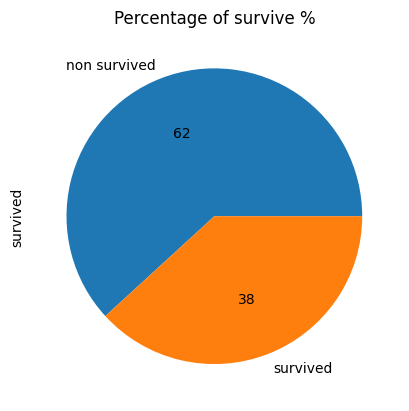

In [30]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

df = pd.read_csv('titanic.csv')
copy_df = df['survived'].value_counts().copy()
copy_df.index = ['non survived','survived']
copy_df.plot(kind='pie',title="Percentage of survive %",legend=False, autopct='%.f')


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# removing name column
df = df.drop(['name'], axis = 1)

# create test and train variables
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'pclass':], df['survived'],
                                                    test_size=0.2, stratify=df['survived'])

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

x_train

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.0,0.336089,0.125,0.000000,0.103644,1.0,0.0,1.0
1,1.0,0.498935,0.125,0.666667,0.091543,1.0,0.0,1.0
2,1.0,0.304773,0.000,0.000000,0.015713,1.0,0.0,1.0
3,0.0,0.298509,0.000,0.000000,0.060508,1.0,0.0,1.0
4,1.0,0.298509,0.125,0.000000,0.030254,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1042,1.0,0.298509,0.000,0.000000,0.015412,1.0,0.0,1.0
1043,1.0,0.336089,0.000,0.000000,0.016908,1.0,0.0,1.0
1044,0.5,0.824627,0.000,0.000000,0.020495,1.0,0.0,1.0
1045,0.0,0.223350,0.000,0.222222,0.155466,0.0,0.0,1.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [ ]:
### write your code here 

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

In [3]:
#### write your code 

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`